In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/archive/BHIST_1920-2100/b.e13.BHISTC5.ne120_t12.cesm-ihesp-hires1.0.30-1920-2100.002/tseries/ice/to_archive/b.e13.BHISTC5.ne120_t12.cesm-ihesp-hires1.0.30-1920-2100.002.cice.h.aice.192001-200512.nc')

In [3]:
plotvar = data.variables['aice'][8:1032:12,247:365,700:1300]

In [4]:
plotvar.shape

(86, 118, 600)

In [5]:
aveplot = plotvar.mean(axis=1)

In [6]:
A = np.arange(86)
B = np.arange(600)
xx, yy = np.meshgrid(B, A)

In [7]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'spacing'
  if sys.path[0] == '':


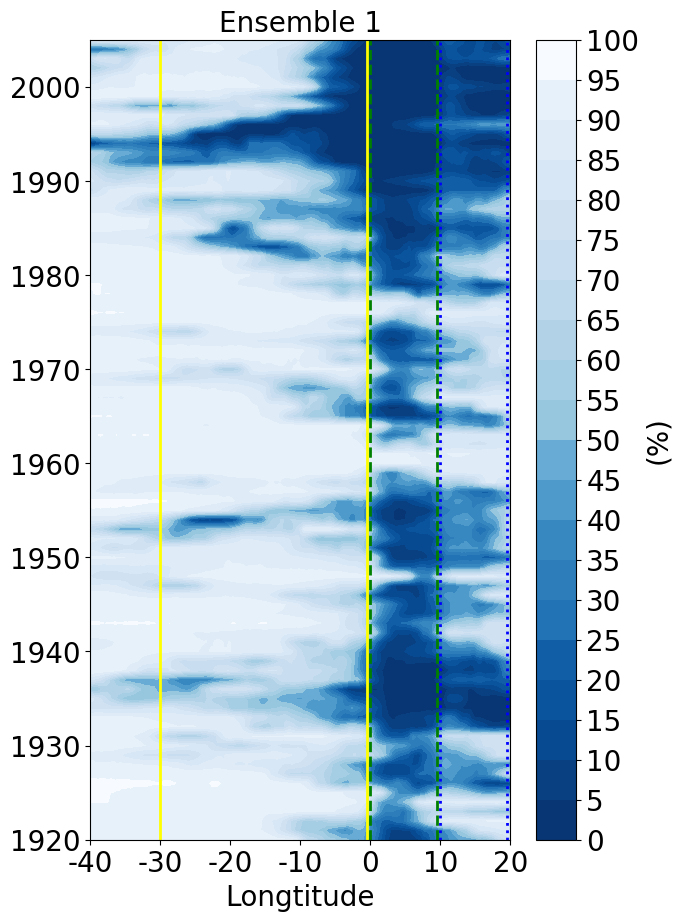

In [9]:
# plot the result
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(15,10), dpi=100)
################################################################
ax1 = fig.add_axes([0.5, 0.1, 0.35, 0.8],
                    xticklabels=[])

#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax1.contourf(xx, yy, aveplot[:,:],cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels)#,extend='max')

im.cmap.set_over('white')

plt.vlines(100, 0, 85, colors = "yellow",linestyles = "solid",linewidth=2)
plt.vlines(395, 0, 85, colors = "yellow",linestyles = "solid",linewidth=2)


plt.vlines(400, 0, 85, colors = "green",linestyles = "dashed",linewidth=2)
plt.vlines(495, 0, 85, colors = "green",linestyles = "dashed",linewidth=2)

plt.vlines(500, 0, 85, colors = "blue",linestyles = "dotted",linewidth=2)
plt.vlines(595, 0, 85, colors = "blue",linestyles = "dotted",linewidth=2)


cbar = fig.colorbar(im, ax=ax1,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(%)', **my_font)
plt.xticks(range(0,601,100), ['-40','-30','-20','-10', '0', '10', '20'],**my_font)
plt.yticks(range(0,86,10), ['1920', '1930','1940', '1950','1960','1970','1980', '1990','2000','2010'],**my_font)
#plt.yticks(range(0,351,50), ['150','200', '250','300', '350','400','450','500'],**my_font)
plt.xlabel('Longtitude',**my_font)
#plt.ylabel('Years',**my_font)
ax1.set_title('Ensemble 1',fontsize = 20)
plt.savefig("LR-HF.png",bbox_inches='tight',dpi=fig.dpi)